In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import hamming_loss
import graphviz 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import zero_one_loss
import seaborn as sns
%matplotlib inline
#label
label_data = pd.read_csv("elac_chapter_labels.csv").drop("Unnamed: 0",axis=1)
#feature
elac_file = "/home/Navneet/ASW/pickle_files/elac_final_merged_sorted_18_aug_with_date.csv"
elac_data = pd.read_csv(elac_file).rename(columns={"Unnamed: 0":"Key"})




## Label to Keep 

In [2]:
target_labels_for_multichain_after_drop = ['3:POWERSUPPLIES', '2:BONDING&LIGHTNINGPROTECTIONS',
       '10:ANALOGINPUTS', '13:WATCHDOG-HEALTHY', '8:ARINCINPUTS/OUTPUTS',
        '6:DISCRETESOUTPUTS', '12:ANALOGOUTPUTS',
       '5:INTERFACES', '7:DISCRETESINPUTS', '4:DIGITALCORE',
       '11:DIFFERENTIALIMPEDANCE,ANIFILTERING', '9:SUPERVISION']
df_merged = pd.merge(elac_data.set_index("Key"),label_data.set_index("BITE_File")[target_labels_for_multichain_after_drop], left_index=True, right_index=True)
df_merged = df_merged.sort_values(["extracted_time_stamp"]).drop(["extracted_time_stamp"],axis=1)
print(df_merged.shape)
df_merged.head(1)

(3627, 472)


,Performed intervention code,bite_records_count,long_power_count,long_start_up_count,pages_loop_count,power_up_total_count,short_power_up_count,short_start_up_count,start_up_total_count,Last_Record_Other,...,10:ANALOGINPUTS,13:WATCHDOG-HEALTHY,8:ARINCINPUTS/OUTPUTS,6:DISCRETESOUTPUTS,12:ANALOGOUTPUTS,5:INTERFACES,7:DISCRETESINPUTS,4:DIGITALCORE,"11:DIFFERENTIALIMPEDANCE,ANIFILTERING",9:SUPERVISION
DECODE_014351-2009-11-25-03h25.TXT,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_merged[target_labels_for_multichain_after_drop].sum(axis=1).value_counts()

0     2821
1      552
2      159
3       32
4       20
6       15
5       13
7       10
8        4
10       1
dtype: int64

## Non Zero Instances

In [4]:
non_zero_index = df_merged[df_merged[target_labels_for_multichain_after_drop].sum(axis=1) !=0].index

In [5]:
df_merged = df_merged[df_merged.index.isin(non_zero_index)]#
print(df_merged.shape)
df_merged.head(1)

(806, 472)


,Performed intervention code,bite_records_count,long_power_count,long_start_up_count,pages_loop_count,power_up_total_count,short_power_up_count,short_start_up_count,start_up_total_count,Last_Record_Other,...,10:ANALOGINPUTS,13:WATCHDOG-HEALTHY,8:ARINCINPUTS/OUTPUTS,6:DISCRETESOUTPUTS,12:ANALOGOUTPUTS,5:INTERFACES,7:DISCRETESINPUTS,4:DIGITALCORE,"11:DIFFERENTIALIMPEDANCE,ANIFILTERING",9:SUPERVISION
DECODE_014666-2010-04-19-12h15.TXT,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


## Count in Each Label

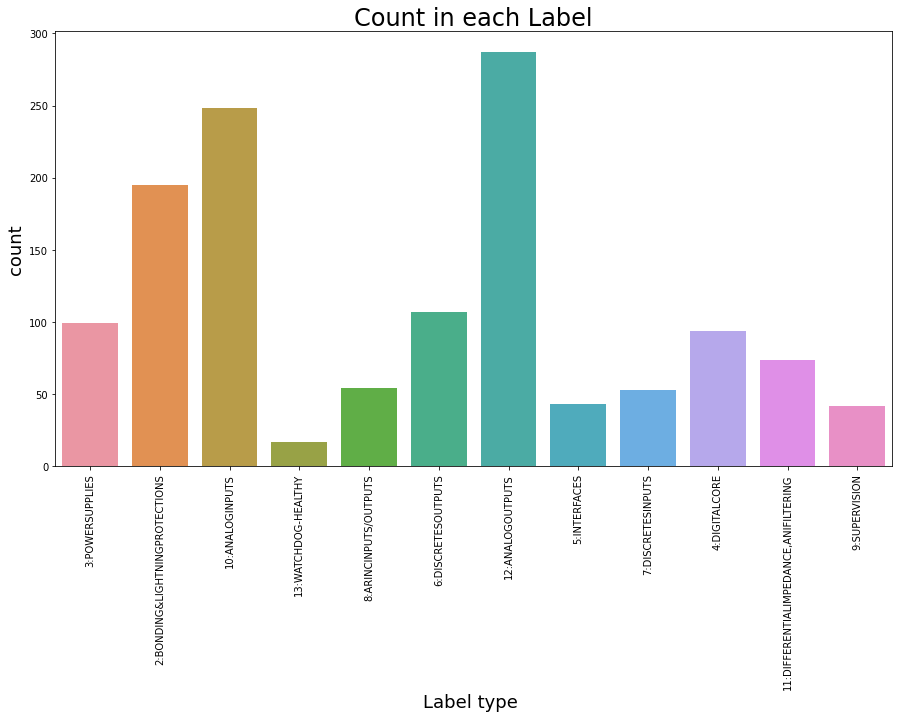

In [6]:
tt = df_merged[target_labels_for_multichain_after_drop].sum()
plt.figure(figsize=(15,8));
sns.barplot(tt.index,tt.values);
plt.title("Count in each Label", fontsize=24);
plt.ylabel('count', fontsize=18);
plt.xlabel('Label type ', fontsize=18);
plt.xticks(rotation=90);

## Counting the number of instances having multiple labels.

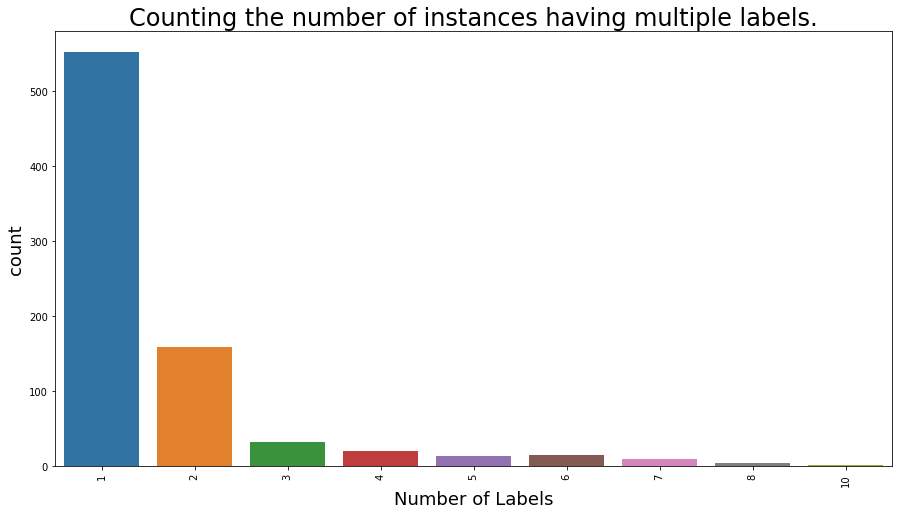

In [7]:
rowSums = df_merged[target_labels_for_multichain_after_drop].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
#multiLabel_counts = multiLabel_counts.iloc[1:]
plt.figure(figsize=(15,8));
sns.barplot(multiLabel_counts.index,multiLabel_counts.values);
plt.title("Counting the number of instances having multiple labels.", fontsize=24);
plt.ylabel('count', fontsize=18);
plt.xlabel('Number of Labels', fontsize=18);
plt.xticks(rotation=90);

## Train-Test Split 

#### With/without Performed intervention code

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_merged, test_size=0.2,shuffle =False)
#df_train, df_test = train_test_split(df_merged.drop("Performed intervention code",axis=1), test_size=0.2,shuffle =False)
print(df_train.shape, df_test.shape)
df_train.head(1)

(644, 472) (162, 472)


,Performed intervention code,bite_records_count,long_power_count,long_start_up_count,pages_loop_count,power_up_total_count,short_power_up_count,short_start_up_count,start_up_total_count,Last_Record_Other,...,10:ANALOGINPUTS,13:WATCHDOG-HEALTHY,8:ARINCINPUTS/OUTPUTS,6:DISCRETESOUTPUTS,12:ANALOGOUTPUTS,5:INTERFACES,7:DISCRETESINPUTS,4:DIGITALCORE,"11:DIFFERENTIALIMPEDANCE,ANIFILTERING",9:SUPERVISION
DECODE_014666-2010-04-19-12h15.TXT,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


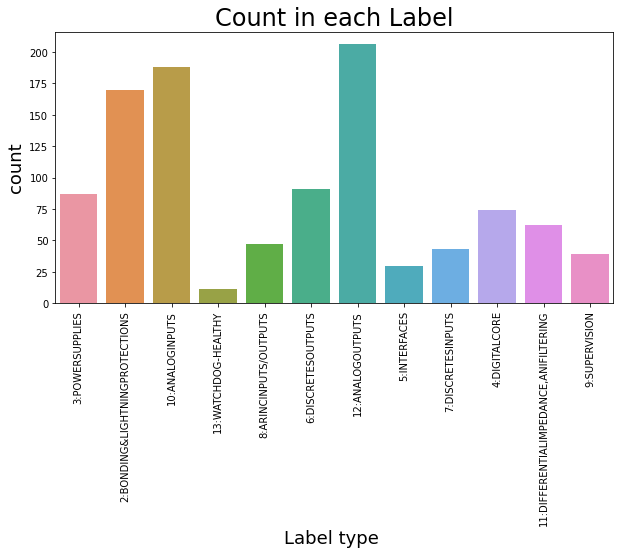

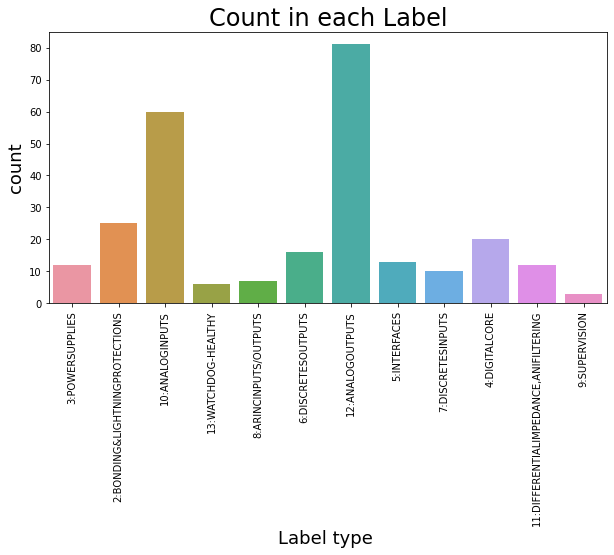

In [9]:
tt = df_train[target_labels_for_multichain_after_drop].sum()
plt.figure(figsize=(10,5));
#pyplot.subplot(1, 2, 1);
sns.barplot(tt.index,tt.values);
plt.title("Count in each Label", fontsize=24);
plt.ylabel('count', fontsize=18);
plt.xlabel('Label type ', fontsize=18);
plt.xticks(rotation=90);

plt.show()

#pyplot.subplot(1, 2, 2)


tt = df_test[target_labels_for_multichain_after_drop].sum()
plt.figure(figsize=(10,5));
#pyplot.subplot(1, 2, 1);
sns.barplot(tt.index,tt.values);
plt.title("Count in each Label", fontsize=24);
plt.ylabel('count', fontsize=18);
plt.xlabel('Label type ', fontsize=18);
plt.xticks(rotation=90);
plt.show()



## Evaluation Metrics 

In multi-label classification, a misclassification is no longer a hard wrong or right. A prediction containing a subset of the actual classes should be considered better than a prediction that contains none of them, i.e., predicting two of the three labels correctly this is better than predicting no labels at all.

## Exact Match Ratio (Subset accuracy):

    It is the most strict metric, indicating the percentage of samples that have all their 
    labels classified correctly --> Sklearn Accuracy Score
    or Zero One Loss(1- Accuracy loss).
    
## Hamming loss   
    Hamming-Loss is the fraction of labels that are incorrectly predicted, i.e., the fraction of the wrong labels to the total number of labels. --> Sklearn hamming loss
   


## OneVsRest 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
#for col in target_labels_for_multichain_after_drop:
for category in target_labels_for_multichain_after_drop:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(df_train.drop(target_labels_for_multichain_after_drop,axis=1), df_train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(df_test.drop(target_labels_for_multichain_after_drop,axis=1))
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction)))
    print("\n")

**Processing 3:POWERSUPPLIES comments...**
Test accuracy is 0.9197530864197531


**Processing 2:BONDING&LIGHTNINGPROTECTIONS comments...**
Test accuracy is 0.7592592592592593


**Processing 10:ANALOGINPUTS comments...**
Test accuracy is 0.6481481481481481


**Processing 13:WATCHDOG-HEALTHY comments...**
Test accuracy is 0.9629629629629629


**Processing 8:ARINCINPUTS/OUTPUTS comments...**
Test accuracy is 0.9567901234567902


**Processing 6:DISCRETESOUTPUTS comments...**
Test accuracy is 0.8827160493827161


**Processing 12:ANALOGOUTPUTS comments...**
Test accuracy is 0.5


**Processing 5:INTERFACES comments...**
Test accuracy is 0.9135802469135802


**Processing 7:DISCRETESINPUTS comments...**
Test accuracy is 0.9382716049382716


**Processing 4:DIGITALCORE comments...**
Test accuracy is 0.8641975308641975


**Processing 11:DIFFERENTIALIMPEDANCE,ANIFILTERING comments...**
Test accuracy is 0.9259259259259259


**Processing 9:SUPERVISION comments...**
Test accuracy is 0.9814814814814815

## Binary Relevance 

    In this case an ensemble of single-label binary classifiers is trained, one for each class. 
    Each classifier predicts either the membership or the non-membership of one class. 
    The union of all classes that were predicted is taken as the multi-label output.

In [20]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(RandomForestClassifier(n_estimators=10000,max_depth=20))
# train
classifier.fit(df_train.drop(target_labels_for_multichain_after_drop,axis=1), df_train[target_labels_for_multichain_after_drop])
# predict
predictions = classifier.predict(df_test.drop(target_labels_for_multichain_after_drop,axis=1))
# accuracy


print("********Train******")
predictions_train = classifier.predict(df_train.drop(target_labels_for_multichain_after_drop,axis=1))
print("Accuracy = ",accuracy_score(df_train[target_labels_for_multichain_after_drop], predictions_train))
print("Hamming loss",hamming_loss(df_train[target_labels_for_multichain_after_drop], predictions_train))
print("Zero One Loss",zero_one_loss(df_train[target_labels_for_multichain_after_drop], predictions_train))





print("********Test******")
print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop], predictions))
print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop], predictions))
print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop], predictions))


print("***"*10)


predictions_out = pd.DataFrame(predictions.todense(), columns=target_labels_for_multichain_after_drop, index=df_test.index)


unique_index = dict(df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts())#.index
#unique_value = df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts().values

accuracy_list = []
zero_one_loss_list = []
hamming_loss_list = []
label_index_list = []
label_values_list = []

for i,j in unique_index.items():
    #print(i,j)
    label_index_list.append(i)
    label_values_list.append(j)
    zz = df_test[target_labels_for_multichain_after_drop].sum(axis=1) == i
    #print(df_test[target_labels_for_multichain_after_drop][zz].shape,predictions_out[zz].shape)
    #print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    accuracy_list.append(accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    hamming_loss_list.append(hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    zero_one_loss_list.append(zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))

    #print("#"*20)
    
pd.DataFrame({"label_index":label_index_list,
             "label_values":label_values_list,
             "accuracy":accuracy_list,
             "zero_one_loss":zero_one_loss_list,
             "hamming_loss":hamming_loss_list})

********Train******
Accuracy =  0.7453416149068323
Hamming loss 0.031314699792960664
Zero One Loss 0.25465838509316774
********Test******
Accuracy =  0.1111111111111111
Hamming loss 0.14248971193415638
Zero One Loss 0.8888888888888888
******************************


,label_index,label_values,accuracy,zero_one_loss,hamming_loss
0,1,113,0.159292,0.840708,0.095133
1,2,30,0.000000,1.000000,0.161111
2,3,6,0.000000,1.000000,0.236111
3,6,4,0.000000,1.000000,0.458333
4,4,4,0.000000,1.000000,0.354167
5,7,2,0.000000,1.000000,0.583333
6,5,2,0.000000,1.000000,0.416667
7,10,1,0.000000,1.000000,0.833333


## Classifier Chains

    Classifier chain can take into account label correlations.


In [12]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(RandomForestClassifier(n_estimators=1000,max_depth=8))
# Training logistic regression model on train data
classifier.fit(df_train.drop(target_labels_for_multichain_after_drop,axis=1), df_train[target_labels_for_multichain_after_drop])
# predict
predictions = classifier.predict(df_test.drop(target_labels_for_multichain_after_drop,axis=1))
print("********Train******")
predictions_train = classifier.predict(df_train.drop(target_labels_for_multichain_after_drop,axis=1))
print("Accuracy = ",accuracy_score(df_train[target_labels_for_multichain_after_drop], predictions_train))
print("Hamming loss",hamming_loss(df_train[target_labels_for_multichain_after_drop], predictions_train))
print("Zero One Loss",zero_one_loss(df_train[target_labels_for_multichain_after_drop], predictions_train))





print("********Test******")
print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop], predictions))
print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop], predictions))
print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop], predictions))


print("***"*10)


predictions_out = pd.DataFrame(predictions.todense(), columns=target_labels_for_multichain_after_drop, index=df_test.index)


unique_index = dict(df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts())#.index
#unique_value = df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts().values

accuracy_list = []
zero_one_loss_list = []
hamming_loss_list = []
label_index_list = []
label_values_list = []

for i,j in unique_index.items():
    #print(i,j)
    label_index_list.append(i)
    label_values_list.append(j)
    zz = df_test[target_labels_for_multichain_after_drop].sum(axis=1) == i
    #print(df_test[target_labels_for_multichain_after_drop][zz].shape,predictions_out[zz].shape)
    #print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    accuracy_list.append(accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    hamming_loss_list.append(hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    zero_one_loss_list.append(zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))

    #print("#"*20)
    
pd.DataFrame({"label_index":label_index_list,
             "label_values":label_values_list,
             "accuracy":accuracy_list,
             "zero_one_loss":zero_one_loss_list,
             "hamming_loss":hamming_loss_list})

********Train******
Accuracy =  0.17236024844720496
Hamming loss 0.11193064182194618
Zero One Loss 0.827639751552795
********Test******
Accuracy =  0.024691358024691357
Hamming loss 0.13477366255144033
Zero One Loss 0.9753086419753086
******************************


,label_index,label_values,accuracy,zero_one_loss,hamming_loss
0,1,113,0.035398,0.964602,0.081858
1,2,30,0.000000,1.000000,0.163889
2,3,6,0.000000,1.000000,0.250000
3,6,4,0.000000,1.000000,0.500000
4,4,4,0.000000,1.000000,0.333333
5,7,2,0.000000,1.000000,0.583333
6,5,2,0.000000,1.000000,0.416667
7,10,1,0.000000,1.000000,0.833333


## Label Powerset
    label powerset transforms this problem into a single multi-class problem
    essentially, concats all labels 

In [13]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(RandomForestClassifier(n_estimators=1000,max_depth=8))
# train
classifier.fit(df_train.drop(target_labels_for_multichain_after_drop,axis=1), df_train[target_labels_for_multichain_after_drop])
# predict
predictions = classifier.predict(df_test.drop(target_labels_for_multichain_after_drop,axis=1))
print("********Train******")
predictions_train = classifier.predict(df_train.drop(target_labels_for_multichain_after_drop,axis=1))
print("Accuracy = ",accuracy_score(df_train[target_labels_for_multichain_after_drop], predictions_train))
print("Hamming loss",hamming_loss(df_train[target_labels_for_multichain_after_drop], predictions_train))
print("Zero One Loss",zero_one_loss(df_train[target_labels_for_multichain_after_drop], predictions_train))





print("********Test******")
print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop], predictions))
print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop], predictions))
print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop], predictions))


print("***"*10)


predictions_out = pd.DataFrame(predictions.todense(), columns=target_labels_for_multichain_after_drop, index=df_test.index)


unique_index = dict(df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts())#.index
#unique_value = df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts().values

accuracy_list = []
zero_one_loss_list = []
hamming_loss_list = []
label_index_list = []
label_values_list = []

for i,j in unique_index.items():
    #print(i,j)
    label_index_list.append(i)
    label_values_list.append(j)
    zz = df_test[target_labels_for_multichain_after_drop].sum(axis=1) == i
    #print(df_test[target_labels_for_multichain_after_drop][zz].shape,predictions_out[zz].shape)
    #print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    accuracy_list.append(accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    hamming_loss_list.append(hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    zero_one_loss_list.append(zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))

    #print("#"*20)
    
pd.DataFrame({"label_index":label_index_list,
             "label_values":label_values_list,
             "accuracy":accuracy_list,
             "zero_one_loss":zero_one_loss_list,
             "hamming_loss":hamming_loss_list})

********Train******
Accuracy =  0.5729813664596274
Hamming loss 0.08993271221532091
Zero One Loss 0.4270186335403726
********Test******
Accuracy =  0.24691358024691357
Hamming loss 0.15329218106995884
Zero One Loss 0.7530864197530864
******************************


,label_index,label_values,accuracy,zero_one_loss,hamming_loss
0,1,113,0.353982,0.646018,0.107670
1,2,30,0.000000,1.000000,0.158333
2,3,6,0.000000,1.000000,0.277778
3,6,4,0.000000,1.000000,0.500000
4,4,4,0.000000,1.000000,0.375000
5,7,2,0.000000,1.000000,0.500000
6,5,2,0.000000,1.000000,0.500000
7,10,1,0.000000,1.000000,0.750000


## Adapted Algorithm 
       Algorithm adaptation methods for multi-label classification concentrate on adapting 
       single-label   classification algorithms to the multi-label case usually by changes in 
       cost/decision functions.

In [14]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=3)
x_train= df_train.drop(target_labels_for_multichain_after_drop,axis=1)
y_train = df_train[target_labels_for_multichain_after_drop]
x_test = df_test.drop(target_labels_for_multichain_after_drop,axis=1)
y_test = df_test[target_labels_for_multichain_after_drop]
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)

print("********Train******")
predictions_train = classifier_new.predict(x_train)
print("Accuracy = ",accuracy_score(y_train, predictions_train))
print("Hamming loss",hamming_loss(y_train, predictions_train))
print("Zero One Loss",zero_one_loss(y_train, predictions_train))





print("********Test******")


# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop], predictions_new))
print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop], predictions_new))




print("***"*10)


predictions_out = pd.DataFrame(predictions_new.todense(), columns=target_labels_for_multichain_after_drop, index=df_test.index)


unique_index = dict(df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts())#.index
#unique_value = df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts().values

accuracy_list = []
zero_one_loss_list = []
hamming_loss_list = []
label_index_list = []
label_values_list = []

for i,j in unique_index.items():
    #print(i,j)
    label_index_list.append(i)
    label_values_list.append(j)
    zz = df_test[target_labels_for_multichain_after_drop].sum(axis=1) == i
    #print(df_test[target_labels_for_multichain_after_drop][zz].shape,predictions_out[zz].shape)
    #print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    accuracy_list.append(accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    hamming_loss_list.append(hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    #print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
    zero_one_loss_list.append(zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))

    #print("#"*20)
    
pd.DataFrame({"label_index":label_index_list,
             "label_values":label_values_list,
             "accuracy":accuracy_list,
             "zero_one_loss":zero_one_loss_list,
             "hamming_loss":hamming_loss_list})

********Train******
Accuracy =  0.2888198757763975
Hamming loss 0.10882505175983437
Zero One Loss 0.7111801242236024
********Test******
Accuracy =  0.1419753086419753
Hamming loss 0.15174897119341563
Zero One Loss 0.8580246913580247
******************************


,label_index,label_values,accuracy,zero_one_loss,hamming_loss
0,1,113,0.20354,0.79646,0.111357
1,2,30,0.00000,1.00000,0.144444
2,3,6,0.00000,1.00000,0.277778
3,6,4,0.00000,1.00000,0.479167
4,4,4,0.00000,1.00000,0.416667
5,7,2,0.00000,1.00000,0.500000
6,5,2,0.00000,1.00000,0.333333
7,10,1,0.00000,1.00000,0.750000


## RF

In [15]:
# from sklearn.multioutput import ClassifierChain
# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier()
# classifier.fit(df_train.drop(target_labels_for_multichain_after_drop,axis=1), df_train[target_labels_for_multichain_after_drop])
# # predict
# predictions = classifier.predict(df_test.drop(target_labels_for_multichain_after_drop,axis=1))
# # accuracy
# print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop], predictions))
# print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop], predictions))
# print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop], predictions))


# print("***"*10)

# predictions_out = pd.DataFrame(predictions, columns=target_labels_for_multichain_after_drop, index=df_test.index)


# unique_index = dict(df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts())#.index
# #unique_value = df_test[target_labels_for_multichain_after_drop].sum(axis=1).value_counts().values
# for i,j in unique_index.items():
#     print(i,j)
#     zz = df_test[target_labels_for_multichain_after_drop].sum(axis=1) == i
#     #print(df_test[target_labels_for_multichain_after_drop][zz].shape,predictions_out[zz].shape)
#     print("Accuracy = ",accuracy_score(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
#     print("Hamming loss",hamming_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))
#     print("Zero One Loss",zero_one_loss(df_test[target_labels_for_multichain_after_drop][zz], predictions_out[zz]))


#     print("#"*20)